# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений.
* В первой модели существуют только два товара определенной цены.
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Импорт библиотек

In [1]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты
from scipy.linalg import solve

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [2]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [3]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

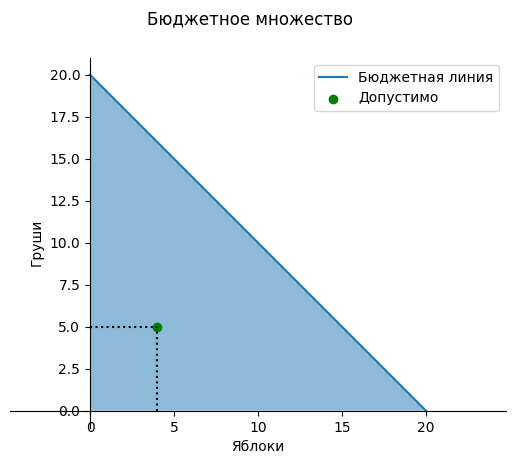

In [4]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''

    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]


    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")

    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else:
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [5]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [ ]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [ ]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов

    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'])
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [ ]:
df_super.to_excel("model1_result.xlsx") # Сохраняем

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
=
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2}
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''

    ones = np.ones([2,1]) # матрица 2x1 из единиц

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

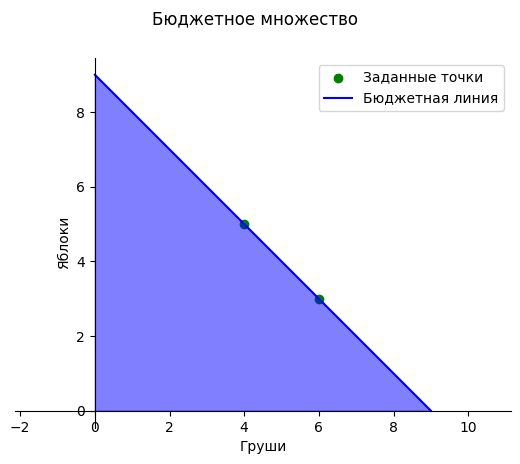

In [ ]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")

    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price]
        y_points = [budget/g2.price, 0]

        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [ ]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''

    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]

print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. ###


Пусть нам известно, что n точек $A_1 = (a_{1,1}, a_{1,2}, ... , a_{1,n})$ , ... , $A_n = (a_{n,1}, a_{n,2}, ... , a_{n,n})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 + ... + p_n x_n= b,$$
где $p_i$ -- цена единицы i-го продукта, $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + ... + p_n a_{1,n} = 1\\
...\\
p_1 a_{n,1} + p_2 a_{n,2} + ... + p_n a_{n,n} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & ... & a_{1,n}\\
    a_{2,1} & a_{2,2} & ... & a_{2,n}\\
    ...\\
    a_{n,1} & a_{n,2} & ... & a_{n,n}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        ... \\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
        1 \\
        1 \\
        ... \\
        1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        ... \\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & ... & a_{1,n}\\
    a_{2,1} & a_{2,2} & ... & a_{2,n}\\
    ...\\
    a_{n,1} & a_{n,2} & ... & a_{n,n}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        ... \\
        1
\end{pmatrix}
$$

In [ ]:
def get_goods_parameters(list_of_points: np.array):
  n = len(list_of_points)

  ones = np.ones([n,1]) # матрица nx1 из единиц

  if np.linalg.det(list_of_points) != 0:
      solution = np.linalg.inv(list_of_points) @ ones
  else:
      return None

  p_min = min(solution)
  if is_equal(p_min, 0) or p_min < 0:
      return None
  else:
      return solution

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]

print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

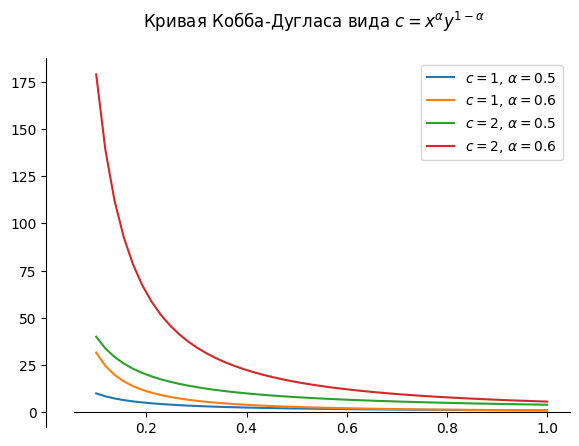

In [ ]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ

    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")


    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()


c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

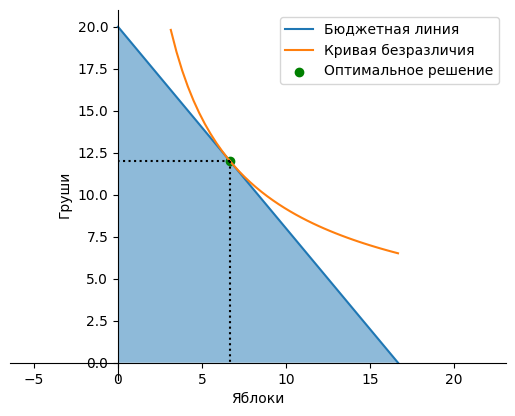

In [ ]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)

    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [ ]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

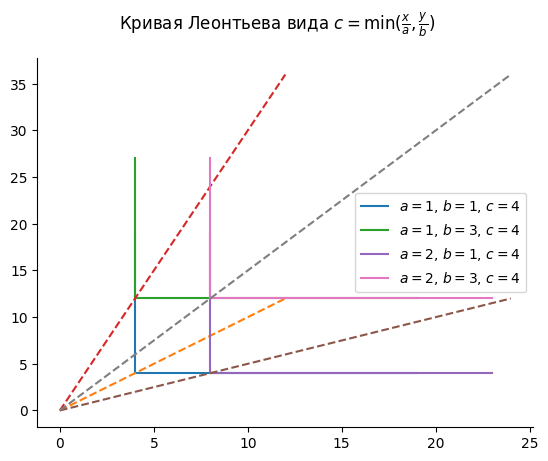

In [ ]:
def plot_Leontev(a_values, b_values):
    c_values = [4] #сами задали значение полезности(можно изменять)

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Леонтьева вида $с = \min(\\frac{x}{a}, \\frac{y}{b})$")

    for c in c_values:
        for a in a_values:
          for b in b_values:
            x_values = [a * c, a * c, a * c + 15] #строим 2 прямые по 3 точкам, т.к. кривые безразличия для функции Леонтьева в этом примере имеют вид прямого угла
            y_values = [c * b + 15, c * b, c * b] #чтобы получить прямую, утсремленную вправо, рассмотрим точку, находящуюся на расстоянии 15 от "угловой"
            ax.plot(x_values, y_values, label=f"$a = {a}$, $b = {b} $, $c = {c} $")
            ax.plot([0, a * c * 3], [0, b * c * 3], linestyle =  'dashed')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()

a_values = [1, 2]
b_values = [1, 3]
plot_Leontev(a_values, b_values)

### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

Чтобы найти оптимальный набор, нужно решить систему (найти пересечение прямой бюджетного ограничения и прямой, по которой двигается "угол" кривой безразличия (дроби x_1/a и x_2/b принимают одинаковые значения)): $$
\begin{cases}
x_1 * p_1 + x_2 * p_2 = budget\\
x_1 * \frac{1}{a} = x_2 * \frac{1}{b}
\end{cases}
$$
Перепишем в матричном виде:
$$
\begin{pmatrix}
    p_1 & p_2 \\
    \frac{1}{a} & -\frac{1}{b}
\end{pmatrix}
\begin{pmatrix}
    x_1 \\
    x_2
\end{pmatrix}
=
\begin{pmatrix}
    budget \\
    0
\end{pmatrix}
$$


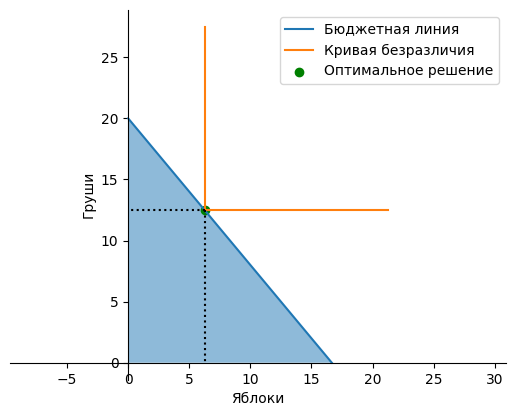

In [ ]:
def budget_Leontev_solution(g1, g2, budget, a, b): #решим СЛУ с помощью метода solve из пакета scipy.linalg
  A = np.array([
      [g1.price, g2.price],
      [1/a, -1/b]])
  m = np.array([budget, 0]).reshape((2, 1))
  solution = solve(A, m)
  x_solution = solution[0][0]
  y_solution = solution[1][0]
  return x_solution, y_solution, min(x_solution / a, y_solution / b)

def plot_budget_Leontev(g1, g2, budget, a, b):
    x_solution, y_solution, c = budget_Leontev_solution(g1, g2, budget, a, b)
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия") #строим бюджетную линию по 2 точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_values = np.linspace(0.1, budget/g1.price)
    x_values_1 = [a * c, a * c, a * c + 15]
    y_values_1 = [c * b + 15, c * b, c * b]
    ax.plot(x_values_1, y_values_1, label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [ ]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [ ]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

Некоторое количество товара 1 выдается бесплатно, поэтому при рассмотрении бюджетного ограничения мы умножаем на цену товара не все приобретенное количество, а только то, которое превышает g1.free. Аналогично и со вторым товаром.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = max((x1 - g1.free), 0) * g1.price + max((x2 - g2.free), 0) * g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

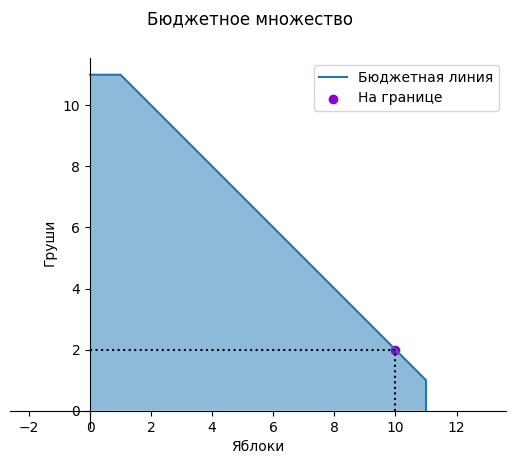

In [ ]:
def plot_budget(g1: Good, g2: Good, budget, x, y):
    #строим график по 4 точкам: для нулевого количества товаров x1 и x2, а также для точек, соответстующим значениям
    #количества товаров, получаемого бесплатно
    x_points = [0, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free]
    y_points = [budget/g2.price + g2.free, budget/g2.price + g2.free, g2.free, 0]

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")

    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "darkviolet"
        point_label = "На границе"
    else:
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)

## Интерактивное представление

In [ ]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

Файл можно скачать по [данной ссылке](https://docs.google.com/spreadsheets/d/1KLNXNQGBo-_YqCXeRItnKD5azXCLsQEt/edit?usp=sharing&ouid=118359247883664487072&rtpof=true&sd=true).

In [ ]:
df = pd.read_excel("/content/model2_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм
df # Печатаем датафрейм

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant
0,Леденцы,8,5,Пастила,4,7,20,6,10
1,Леденцы,8,7,Пастила,4,8,34,8,2
2,Ириски,10,2,Халва,2,20,16,2,6
3,Конфеты,12,1,Печенье,8,3,35,68,14
4,Конфеты,12,9,Печенье,8,15,35,10,9
5,Конфеты,12,0,Печенье,8,9,70,15,50


In [ ]:
result = []
for index, row in df.iterrows():
    g1 = Good(row['G1_name'], row['G1_price'], row['G1_free'])
    g2 = Good(row['G2_name'], row['G2_price'], row['G2_free'])
    #воспользуемся уже описанной в задании 4 для модели 2 функцией budget_test
    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
0,Леденцы,8,5,Пастила,4,7,20,6,10,0
1,Леденцы,8,7,Пастила,4,8,34,8,2,1
2,Ириски,10,2,Халва,2,20,16,2,6,1
3,Конфеты,12,1,Печенье,8,3,35,68,14,-1
4,Конфеты,12,9,Печенье,8,15,35,10,9,1
5,Конфеты,12,0,Печенье,8,9,70,15,50,-1


In [ ]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
0,Леденцы,8,5,Пастила,4,7,20,6,10,0
1,Леденцы,8,7,Пастила,4,8,34,8,2,1
2,Ириски,10,2,Халва,2,20,16,2,6,1
4,Конфеты,12,9,Печенье,8,15,35,10,9,1


In [ ]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
2,Ириски,10,2,Халва,2,20,16,2,6,1
0,Леденцы,8,5,Пастила,4,7,20,6,10,0
1,Леденцы,8,7,Пастила,4,8,34,8,2,1
4,Конфеты,12,9,Печенье,8,15,35,10,9,1


In [ ]:
df_super.to_excel("model2_result.xlsx") # Сохраняем

## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

Без ограничения общности мы можем считать, что бюджет потребителя (m) равен 1, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Случай 1: положим $free_1 = p4_x$; free_2 = 0; по оси OY точка пересечения с ней имеет коорадинату $p2.y = free_2 + \frac{m}{price_2} \Rightarrow$ при free_2 = 0, зная $p2.y$ и m = 1, можем установить, что $price_2 = \frac{1}{p2.y}$. Про пересечение с осью OX ничего не известно, поэтому можем сказать, что $price_1 = 1$.\
Случай 2: график имеет вид правого верхнего угла - такой случай невозможен, поскольку даже при очень малых значениях $m \gt 0$ и очень больших значениях $price_1$ и $price_2$ потребитель сможет купить какое-то количество товаров, а значит, между горизонтальной и вертикальной прямыми должна быть еще одна.\
Случай 3: получается, что между точками (0; $free_2 + \frac{m}{price_2}$) и ($free_1$, $free_2 + \frac{m}{price_2}$) существует разрыв - это невозможно.\
Случай 4: скажем, что $free_1 = p3.x, free_2 = 0$, и найдем значения k и b в уравнении kx + b прямой, проходящей через $p_3$ и $p_4$. Затем найдем решение уравнения kx + b = 0: x = $-\frac{b}{k}$ - это будет значение x в точке пересечения этой прямой с осью OY, то есть точка $\frac{m}{price_1} + free_1$; m = 1, значит, $price_1$ = $-\frac{1}{-free_1 - \frac{b}{k}}$; $free_2 = 0$ $\Rightarrow$ $price_2 = \frac{1}{p2_y}$.\
Комментарий 1: из интерактивного представления в задании 5 видно, что горизональная прямая на графике бюджетного ограничения описанной модели может быть только одна, причем идти она должна от точки пересечения с осью ОХ (то есть до нее никаких прямых быть не должно, и разрывать ее никакие прямые также не могут).\
Случай 5: рассматриваемая модель не предусматривает наличия двух горизонтальных прямых на разных уровнях в бюджетном ограничении(см. интерактивное представление в задании 5).\
Случай 6: положим $f_1 = p2.x, f_2 = p3.y$. Тогда $\frac{1}{price_1} + p2.y = p4.x (точка пересечения с осью ОХ) \Rightarrow price_1 = \frac{1}{p4.x - p2.x}$; по аналогичным соображениям $price_2 = \frac{1}{p2.y - p3.y}$.\
Случай 7: построим прямую, проходящую через p3 и p4: kx + b; затем рассмотрим точку пересечения ее с прямой, проходящей через точки p1 и p2: kx + b = p1.y $\Rightarrow$ x = $\frac{p1.y - b}{k}$. Если найденное значение х меньше, чем p2.x, то данный случай невозможен (см. интерактивное представление в задании 5). Если же x >= p2.x, то положим $f_1 = x, f_2 = p4.y,$ тогда $price_2 = \frac{1}{p1.y - p4.y}, price_1 = \frac{1}{p4.x - x}$.\
Комментарий 2: из интерактивного представления в задании 5 видно, что вертикальная прямая на графике бюджетного ограничения описанной модели может быть только одна, причем идти она должна от точки пересечения с осью ОУ (то есть после нее никаких прямых быть не должно, и разрывать ее никакие прямые также не могут).\
Случай 8 - это объединение случая 7 для варианта, когда и $free_1 \gt 0$, и $free_2 \gt 0$ - построим прямую, проходящую через p2 и p3: kx + b; затем рассмотрим точку пересечения ее с прямой, проходящей через точки p1 и p4: kx + b = p1.y и y = k * p4_x + b $\Rightarrow$ x = $\frac{p1.y - b}{k}$. Если найденное значение х меньше, чем p1.x, то данный случай невозможен (см. интерактивное представление в задании 5). Если найденное значение y меньше, чем p4.y, данные случай также невозможен. Если же оба значения больше или равны указанных, то $free_1 = x, free_2 = y$, и тогда $price_1 =   \frac{1}{p4.x - x}  , price_2 = \frac{1}{p1.y - y}$.


In [ ]:
def get_goods_parameters(list_of_points):
  list_of_points = sorted(list_of_points, key=lambda x: (-x[1], x[0])) #сортируем точки сначала по y (по убыванию) затем - по x (по возрастанию)
  #теперь рассмотрим всевозможные случаи расположения точек относительно друг друга
  p1 = list_of_points[0]
  p1_x = p1[0]
  p1_y = p1[1]
  p2 = list_of_points[1]
  p2_x = p2[0]
  p2_y = p2[1]
  p3 = list_of_points[2]
  p3_x = p3[0]
  p3_y = p3[1]
  p4 = list_of_points[3]
  p4_x = p4[0]
  p4_y = p4[1]
  if p1_y == p2_y == p3_y == p4_y: #случай 1
    solution = [1, 1 / p2_y, p4_x, 0]
  elif p1_y == p2_y == p3_y:
    if p4_x == p3_x: #случай 2
      return None
    elif p4_x < p3_x: #случай 3
      return None
    else: #случай 4
      coefficients = np.polyfit([p3_x, p4_x], [p3_y, p4_y], 1)
      k = coefficients[0]
      b = coefficients[1]
      free_1 = p3_x
      if -1 / (free_1 + (b / k)) > 0: #цены должны быть положительны, иначе решений нет
        solution = [-1 / (free_1 + (b / k)), 1 / p2_y, p3_x, 0]
      else:
        return None
  elif p2_y == p3_y == p4_y or p1_y == p2_y == p4_y: #комментарий 1
    return None
  elif p1_y == p2_y:
    if p3_y == p4_y: #случай 5
      return None
    else:
      if p3_x > p2_x and p4_x > p2_x: #мы остортировали значения у по возрастанию, и должны проверить, что точки с меньшими значениями н должны иметь бОльшие (или равные) значения х - см. интерактивное представление в задании 5
        if p3_x == p4_x: #случай 6
          solution = [1 / (p4_x - p2_x), 1 / (p2_y - p3_y), p2_x, p3_y]
        elif p3_x < p4_x: #случай 7
          coefficients = np.polyfit([p3_x, p4_x], [p3_y, p4_y], 1)
          k = coefficients[0]
          b = coefficients[1]
          x = (p1_y - b) / k
          if x > p2_x or is_equal(x, p2_x):
            if p4_x - x > 0 and p1_y - p4_y > 0: #цены должны быть положительны, иначе решений нет
              solution = [1 / (p4_x - x), 1 / (p1_y - p4_y), x, p4_y]
            else:
              return None
          else:
            return None
        else:
          return None
      else:
        return None
  elif p1_y == p3_y or p1_y == p4_y or p2_y == p3_y or p2_y == p4_y or p3_y == p4_y: #комментарий 1
    return None
  else: #теперь рассматриваем случаи, когда никакие у не равны - они абсолютно аналогичные уже рассмотренным ранее, поэтому я просто буду ссылаться на уже описанные (и некоторые добавленные) рассуждения
    if p1_x == p2_x == p3_x == p4_x: #случай 1
      solution = [1 / p1_x, 1, 0, p1.y]
    elif p1_x == p2_x == p3_x or p1_x == p3_x == p4_x: #комментарий 2
      return None
    elif p2_x == p3_x == p4_x: #комментарий 2
      if p1_x > p2_x: #комментарий 2
        return None
      else: #случай 4
        coefficients = np.polyfit([p1_x, p2_x], [p1_y, p2_y], 1)
        k = coefficients[0]
        b = coefficients[1]
        free_2 = p2_y
        if -1 / (free_1 + (b / k)) > 0: #цены должны быть положительны, иначе решений нет
          solution = [1 / p4_x, 1 / (b - p2_y), 0, p2_y]
          solution = [-1 / (free_1 + (b / k)), 1 / p2_y, p3_x, 0]
        else:
          return None
    elif p1_x == p2_x or p1_x == p3_x or p1_x == p4_x or p2_x == p3_x or p2_x == p4_x: #комментарий 2
      return None
    elif p3_x == p4_x: #комментарий 2
      if p1_x > p2_x: #комментарий 2
        return None
      else: #случай 7
        coefficients = np.polyfit([p1_x, p2_x], [p1_y, p2_y], 1)
        k = coefficients[0]
        b = coefficients[1]
        y = k * p4_x + b
        if is_equal(y, p3_y) or y > p3_y:
          solution = [1 / (p4_x - p1_x), 1 / (p1_y - y), p1_x, y]
        else:
          return None
    else: #теперь рассмотрим случай, когда значения по осям абсцисс и ординат не совпадают ни у какой пары точек
      if p1_x < p2_x < p3_x < p4_x:
        coefficients = np.polyfit([p1_x, p2_x], [p1_y, p2_y], 1)
        k = coefficients[0]
        b = coefficients[1]
        if is_equal(k * p3_x, p3_y) and is_equal(k * p4_y, p4_y): #если все 4 точки лежат на одной прямой, то возвращаемся к модели 1: free_1 = free_2 = 0
          solution = [b, -b / k, 0, 0]
        elif is_equal(k * p3_x, p3_y): #прямая проходит через 3 последние точки - случай 7
          y = p4_x * k + b
          if y > p4_y or is_equal(y, p4_x):
            solution = [1 / p4_x, 1 / (p1_y - y), 0, y]
          else:
            return None
        else:
          coefficients = np.polyfit([p2_x, p3_x], [p2_y, p3_y], 1)
          k = coefficients[0]
          b = coefficients[1]
          y = k * p4_x + b
          x = (p1_y - b) / k
          if (x > p1_x or is_equal(x, p1_x)) and (y > p4_y or is_equal(y, p4_y)): #прямая проходит через 2 средние точки - случай 8
            solution = [1 / (p4_x - x), 1 / (p1_y - y), x, y]
          else: #прямая проходит через 3 первые точки - случай 7
            k = coefficients[0]
            b = coefficients[1]
            if is_equal(k * p4_x, p4_y):
              x = (p1_y - b) / k
              if x > p1_x or is_equal(x, p1_x):
                solution = [1 / (p4_x - x), 1 / p1_y, p1_x, 0]
              else:
                return None
            else:
              return None
      else:
        return None
  return solution


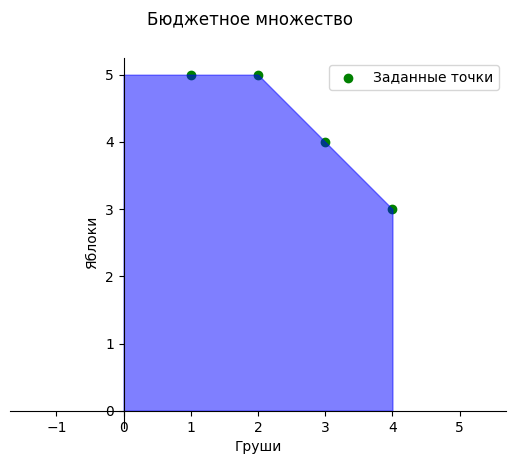

In [ ]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")

    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        g1 = Good("Груши", result[0], result[2])
        g2 = Good("Яблоки", result[1], result[3])
        budget = 1
        x_points = [0, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free]
        y_points = [budget/g2.price + g2.free, budget/g2.price + g2.free, g2.free, 0]
        fig.suptitle("Бюджетное множество")
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [1,5],
    [2,5],
    [3,4],
    [4,3]
]

plot_goods_parameters(list_of_points)

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

Бюджетное ограничение в данной модели имеет вид $$(x_1 - g1.free) * g1.price + (x_2 - g2.free) * g2.price = budget$$ Преобразуем: $$(x_1 * g1.price + x_2 * g2.price = budget + g1.free * g1.price + g2.free * g2.price$$ Получается, что для поиска оптимального решения мы все еще можем использовать формулу $$
\begin{cases}
x_1 = \frac{\alpha * budget}{g1.price}\\
x_2 = \frac{(1-\alpha) * budget}{g2.price}\\
\end{cases}
$$
Однако в качестве budget теперь выступает budget + g1.price * g1.free + g2.price * g2.free

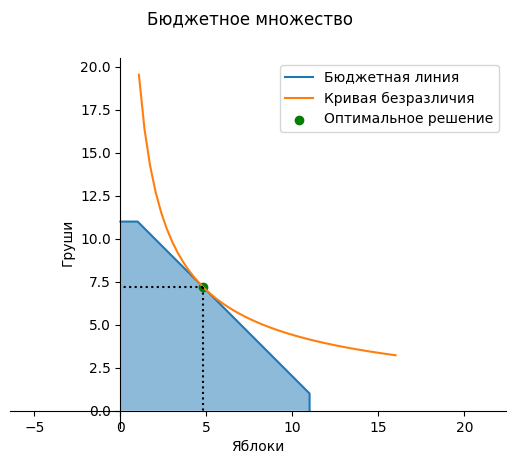

In [ ]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def budget_Cobb_Douglas_solution(g1: Good, g2: Good, budget, alpha=0.5):
    budget_new = budget + g1.price * g1.free + g2.price * g2.free
    x_solution = alpha*budget_new/g1.price
    y_solution = (1-alpha)*budget_new/g2.price
    if x_solution > (budget/g1.price) + g1.free: #проверяем: если значение x_1 в оптимальном решении превышает количество этого товара, которое мы можем себе позволить,
    #то оптимальное решение лежит в правом нижнемуглу (см. рисунок)
      x_solution = budget/g1.price + g1.free
      y_solution = g2.free
    elif y_solution > (budget/g2.price) + g2.free: #если значение y_1 превышает "-", то решение лежит в левом верхнем углу
      x_solution = g1.free
      y_solution = budget/g2.price + g2.free
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha) #функция возвращаент оптимальное решение и значение полезности
def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):

    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)

    x_points = [0, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free]
    y_points = [budget/g2.price + g2.free, budget/g2.price + g2.free, g2.free, 0]

    fig, ax = plt.subplots()
    fig.suptitle("Бюджетное множество")

    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_values = np.linspace(0.1, budget/g1.price + g1.free + 5)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price + 10
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [ ]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [ ]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, threshold, price_1, price_2):
      self.name = name
      self.threshold = threshold
      self.price_1 = price_1
      self.price_2 = price_2
    def price(self, quantity):
      if quantity > self.threshold: #рассматриваем 2 случая: когда количество товаров превыешает значение threshold и когда не превышает (во втором случае важна только price_1)
        ans = self.threshold * self.price_1 + (quantity - self.threshold) * self.price_2 #в соответствии с заданной моделью threshold товаров покупаем по цене 1, а оставшееся количество  по цене 2
      else:
        ans = quantity * self.price_1
      return ans
    def quantity(self, budget):
      cnt = 0
      if budget > self.price_1 * self.threshold: #аналогично: в зависимости от бюджета рассматриваем 2 случая: огда покупатель может купить количество товара, превышащее значение thershold, и когда не может (во втором случае важна только price_1)
        cnt = self.threshold + (budget - self.price_1 * self.threshold) / self.price_2 #по цене 1 покупаем количество threshold, после чего у нас останется budget - self.price_1 * self.threshold денег, разделив которые на цену 2, получим оставшееся количество товара, которое мы сможем докупить
      else:
        cnt = budget / self.price_1
      return cnt

## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = g1.price(x1) + g2.price(x2) #воспользуемся методом priсe, описанном в предыдущем пункте: передав значение товаров 1 и 2, получим их стоимость, которую в дальнейшем сравним с имеющимся бюджетом
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

Рассмотрим 4 случая:
* И товара 1, и товара 2 можем купить больше, чем значение threshold => строим прямую по 4 точкам (рассмотрим нулевое количество товаров 1 и 2, а также пороговое количество для обоих товаров
* Можем купить больше только товара 1 => строим график по 3 точкам: нулевое количество обоих товаров и пороговое количество только для товара 1 (пороговое количество товара 2 не будет лежать в бюджетном множестве)
* Можем купить больше только товара 2 => случай аналогичен предыдущему, но товары 1 и 2 меняются местами
* Ни товара 1, ни товара 2 неможем купить больше порогового значения => строим график по 2 точкам (нулевое количество товара 1 и товара 2 - в этом случай модель аналогична модели 1)

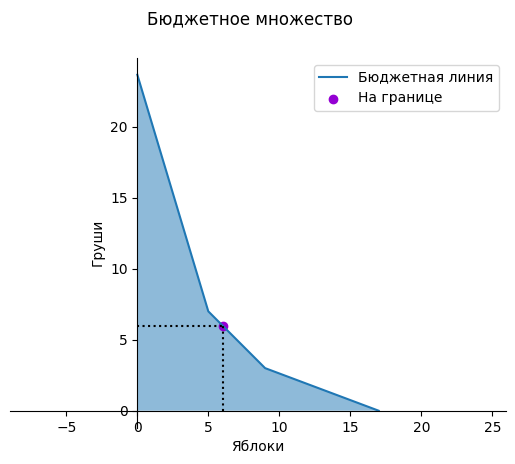

In [ ]:
def plot_budget(g1: Good, g2: Good, budget, x, y):
  if budget > g1.threshold * g1.price_1 and budget > g2.threshold * g2.price_1:
    if g1.threshold < g1.quantity(budget - g2.threshold * g2.price_1): #проверяем расположение граничных точек относительно друг друга, чтобы график построился корректно (от меньшей точки по оси OX к большей)
      x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold * g2.price_1), g1.quantity(budget)]
      y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold * g1.price_1), g2.threshold, 0]
    else:
      x_points = [0, g1.quantity(budget - g2.threshold * g2.price_1), g1.threshold, g1.quantity(budget)]
      y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.threshold * g1.price_1), 0]
  elif budget > g1.threshold * g1.price_1 and budget <= g2.threshold * g2.price_1:
    x_points = [0, g1.threshold, g1.quantity(budget)]
    y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold * g1.price_1), 0]
  elif budget <= g1.threshold * g1.price_1 and budget > g2.threshold * g2.price_1:
    x_points = [0, g1.quantity(budget), g1.quantity(budget - g2.threshold * g2.price_1)]
    y_points = [g2.quantity(budget), 0, g2.quantity(g2.threshold)]
  elif budget <= g1.threshold * g1.price_1 and budget <= g2.threshold * g2.price_1:
    x_points = [0, g1.quantity(budget)]
    y_points = [g2.quantity(budget), 0]
  fig, ax = plt.subplots()
  fig.suptitle("Бюджетное множество")

  ax.plot(x_points, y_points, label="Бюджетная линия")
  ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

  point_status = budget_test(g1, g2, budget, x, y)

  if point_status == 1:
      point_color = "green"
      point_label = "Допустимо"
  elif point_status == 0:
      point_color = "darkviolet"
      point_label = "На границе"
  else:
      point_color = "red"
      point_label = "Недопустимо"
  # Добавляем названия осей
  ax.scatter(x, y, color=point_color, label=point_label)
  ax.plot([x, x], [0, y], 'k:')
  ax.plot([0, x], [y, y], 'k:')

  ax.set_xlabel(g1.name)
  ax.set_ylabel(g2.name)

  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_visible(False)

  ax.axis('equal')
  ax.legend() # Отображаем легенду (информацию о данных)
  plt.show()

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
plot_budget(g1, g2, budget, 6, 6)

In [ ]:
def interactive_plot(threshold_1, price1_1, price1_2, threshold_2, price2_1, price2_2, budget, x, y):
    g1 = Good("Яблоки", threshold_1, price1_1, price1_2)
    g2 = Good("Груши", threshold_2, price2_1, price2_2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, threshold_1=(1, 10), price1_1=(1, 10),price1_2 = (1, 10), threshold_2=(1, 10), price2_1=(1, 10),price2_2 = (1, 10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='threshold_1', max=10, min=1), IntSlider(value=5, descrip…

<function __main__.interactive_plot(threshold_1, price1_1, price1_2, threshold_2, price2_1, price2_2, budget, x, y)>